In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Money Laundering.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [8]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

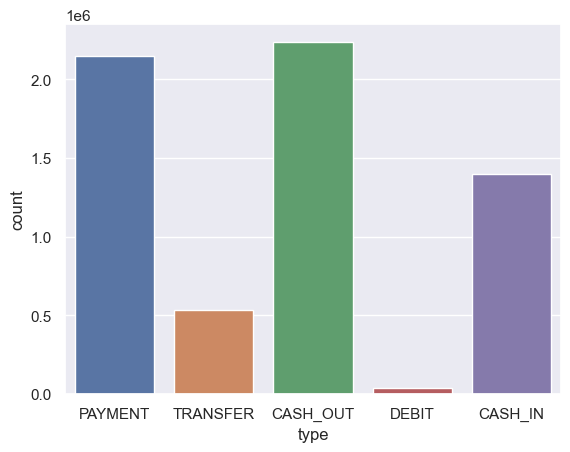

In [9]:
sns.countplot(x='type',data=df)

In [10]:
df['type']=df['type'].astype('category')
df['type']=df['type'].cat.codes

In [11]:
df.type.value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [12]:
df.step.value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

<Axes: xlabel='step', ylabel='count'>

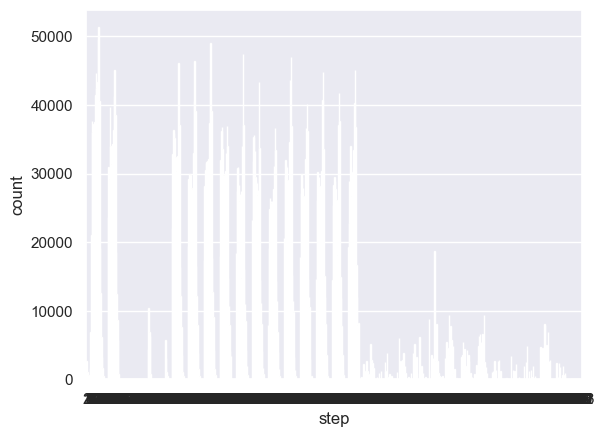

In [13]:
sns.countplot(x='step',data=df)

In [14]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

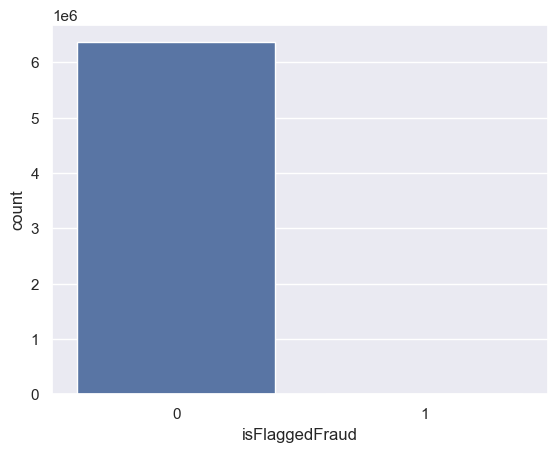

In [15]:
sns.countplot(x='isFlaggedFraud',data=df)

In [16]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

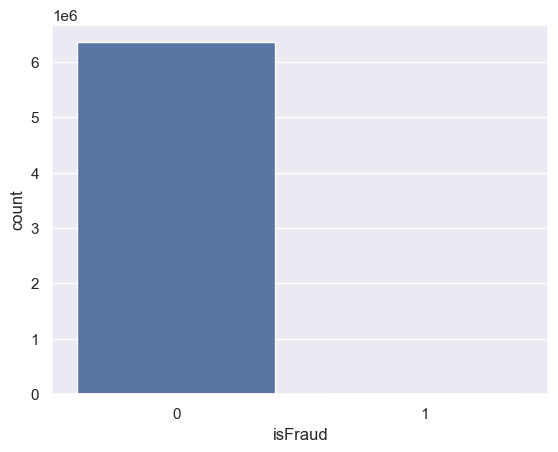

In [17]:
sns.countplot(x='isFraud',data=df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int8   
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), int8(1)
memory usage: 394.4 MB


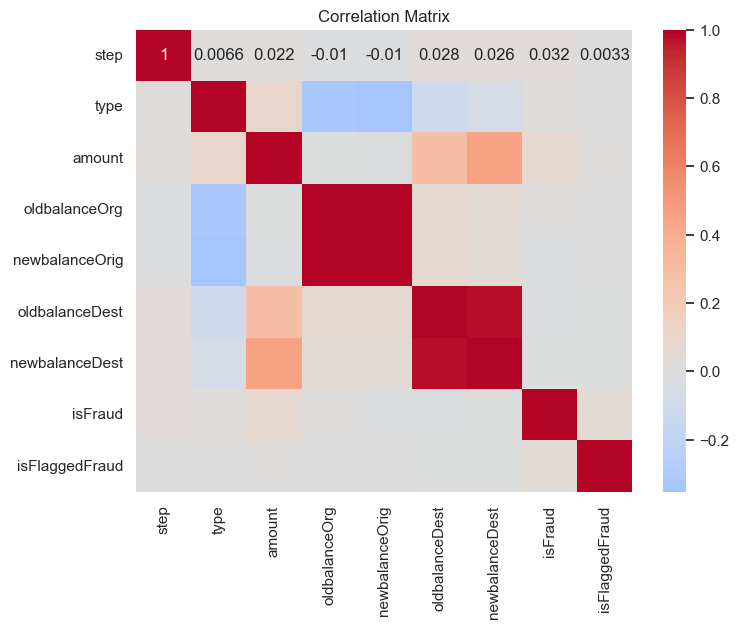

In [19]:
#multi- coreelation 
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Add title and labels
plt.title('Correlation Matrix')
plt.show()

In [20]:
for i in df.columns:
    print("*****************************************", i ,
         "************************************************")
    print()
    print(set(df[i].tolist()))
    print()

***************************************** step ************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{0, 1}



In [21]:
x=df.drop(['isFraud'],axis=1)
y=df[['isFraud']]   

In [22]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [23]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [24]:
x1=x.copy()

In [25]:
y.value_counts()/len(y)*100

isFraud
0          99.870918
1           0.129082
Name: count, dtype: float64

In [26]:
y.value_counts()

isFraud
0          6354407
1             8213
Name: count, dtype: int64

Number of Zero : 6354407
Number of One : 8213


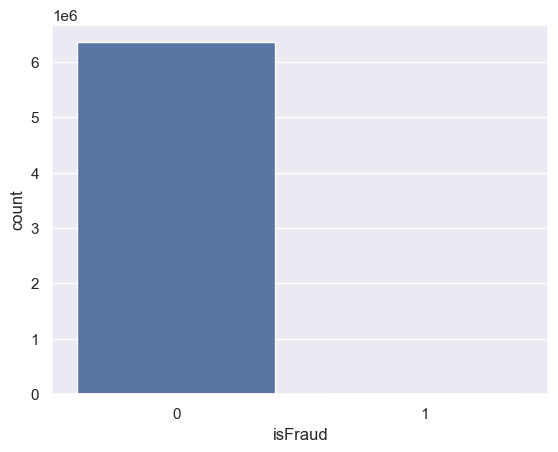

In [27]:
#IMBALANCE CHECK
sns.countplot(data=y, x='isFraud')
Zero, One = df['isFraud'].value_counts()
print("Number of Zero :", Zero)
print("Number of One :", One)
plt.show()

In [28]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({'isFraud': 1})


In [29]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({'isFraud': 1})


In [30]:
print(y.value_counts())
print()
print(y_ros.value_counts())

isFraud
0          6354407
1             8213
Name: count, dtype: int64

isFraud
0          6354407
1          6354407
Name: count, dtype: int64


In [31]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler()
x_scaled = x_scaled.fit_transform(x_ros)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
y=y_ros

In [32]:
x_scaled

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,-1.575786,0.604432,-0.435616,-0.328742,-0.144854,-0.244802,-0.331622,-0.031279
1,-1.575786,0.604432,-0.439888,-0.374443,-0.200969,-0.244802,-0.331622,-0.031279
2,-1.575786,1.280210,-0.440789,-0.380910,-0.208689,-0.244802,-0.331622,-0.031279
3,-1.575786,-0.747123,-0.440789,-0.380910,-0.208689,-0.238493,-0.331622,-0.031279
4,-1.575786,0.604432,-0.434636,-0.368210,-0.196787,-0.244802,-0.331622,-0.031279
...,...,...,...,...,...,...,...,...
12708809,1.432645,1.280210,-0.111254,-0.192068,-0.208689,-0.244802,-0.331622,-0.031279
12708810,1.303417,1.280210,0.732573,0.291493,-0.208689,-0.244802,-0.331622,-0.031279
12708811,-1.281146,1.280210,-0.196235,-0.240767,-0.208689,-0.244802,-0.331622,-0.031279
12708812,0.057657,1.280210,-0.440622,-0.380814,-0.208689,-0.244802,-0.331622,-0.031279


In [33]:
#from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)
print(x.shape)
print(x_pca.shape)

In [35]:
# Split the data into training and test for model building
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Applying all the model together

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier = RF + GDBoosting - lambda - regularisation, gamma - autoprunning, eta - learning optimization rate
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)             
                             
                             
# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr) 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

In [ ]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [ ]:
# RANDOMFOREST CLASSIFIER
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(accuracy_rf_train)
print()
print(accuracy_rf_test)
print('*********************')
classification_rf_test = classification_report(y_test, y_pred_rf_test)
classification_rf_train = classification_report(y_train, y_pred_rf_train)
print(classification_rf_train)
print()
print(classification_rf_test)
print('*********************')
confusion_rf_test = confusion_matrix(y_test, y_pred_rf_test)
confusion_rf_train = confusion_matrix(y_train, y_pred_rf_train)
print(confusion_rf_train)
print()
print(confusion_rf_test)


In [ ]:
# GRADING BOOSTING CLASSIFIER
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd_train = gdb.predict(x_train)
y_pred_gd_test = gdb.predict(x_test)
accuracy_gd_test = accuracy_score(y_test, y_pred_gd_test)
accuracy_gd_train = accuracy_score(y_train, y_pred_gd_train)
print(accuracy_gd_train)
print()
print(accuracy_gd_test)
print('*********************')
classification_gd_test = classification_report(y_test, y_pred_gd_test)
classification_gd_train = classification_report(y_train, y_pred_gd_train)
print(classification_gd_train)
print()
print(classification_gd_test)
print('*********************')
confusion_gd_test = confusion_matrix(y_test, y_pred_gd_test)
confusion_gd_train = confusion_matrix(y_train, y_pred_gd_train)
print(confusion_gd_train)
print()
print(confusion_gd_test)


In [ ]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(training_accuracy)
print(test_accuracy)